# some supporting code 


## Extracting some geos data

Drop some variables, create a new dataset with just air density (AIRDENS)

In [1]:
import yt_xarray as ytxr 

ds = ytxr.open_dataset('geos/GEOS.fp.asm.inst3_3d_aer_Nv.20180822_0900.V01.nc4')

In [2]:
ds.data_vars.keys()

KeysView(Data variables:
    AIRDENS   (time, lev, lat, lon) float32 239MB ...
    BCPHILIC  (time, lev, lat, lon) float32 239MB ...
    BCPHOBIC  (time, lev, lat, lon) float32 239MB ...
    DELP      (time, lev, lat, lon) float32 239MB ...
    DMS       (time, lev, lat, lon) float32 239MB ...
    DU001     (time, lev, lat, lon) float32 239MB ...
    DU002     (time, lev, lat, lon) float32 239MB ...
    DU003     (time, lev, lat, lon) float32 239MB ...
    DU004     (time, lev, lat, lon) float32 239MB ...
    DU005     (time, lev, lat, lon) float32 239MB ...
    LWI       (time, lat, lon) float32 3MB ...
    MSA       (time, lev, lat, lon) float32 239MB ...
    NH3       (time, lev, lat, lon) float32 239MB ...
    NH4A      (time, lev, lat, lon) float32 239MB ...
    NO3AN1    (time, lev, lat, lon) float32 239MB ...
    NO3AN2    (time, lev, lat, lon) float32 239MB ...
    NO3AN3    (time, lev, lat, lon) float32 239MB ...
    OCPHILIC  (time, lev, lat, lon) float32 239MB ...
    OCPHOB

In [3]:
ds = ds.drop_vars(names = [key for key in ds.data_vars.keys() if key != 'AIRDENS'])

In [4]:
import os 

newfile = '/home/chavlin/data/yt_data/yt_sample_sets/geos/AIRDENS.GEOS.fp.asm.inst3_3d_aer_Nv.20180822_0900.V01.nc4'
if os.path.isfile(newfile):
    os.remove(newfile)

In [5]:
ds.to_netcdf(newfile)

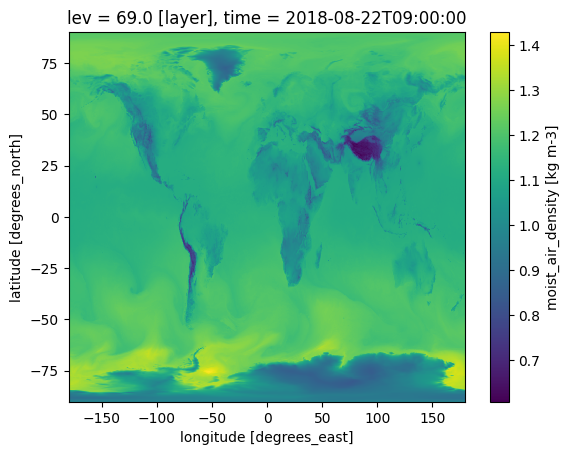

In [15]:
ds.AIRDENS.isel({'time':0, 'lev':68}).plot()

## create a uniform grid version of a dataset

In [18]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")


yt : [INFO     ] 2025-07-14 14:58:40,291 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2025-07-14 14:58:40,294 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-14 14:58:40,296 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-14 14:58:40,297 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-14 14:58:40,299 Parameters: cosmological_simulation   = 0


In [20]:
h_wid = ds.domain_width / 4 / 2
ag = ds.arbitrary_grid(ds.domain_center - h_wid, 
                       ds.domain_center + h_wid, 
                       (128, 128, 128)
                      )

data = {'density': ag['gas', 'density']}


Parsing Hierarchy : 100%|███████████████████| 173/173 [00:00<00:00, 5358.97it/s]
yt : [INFO     ] 2025-07-14 15:00:28,967 Gathering a field list (this may take a moment.)


In [23]:
ag.shape, ag.left_edge, ag.right_edge

((128, 128, 128),
 unyt_array([0.375, 0.375, 0.375], 'code_length'),
 unyt_array([0.625, 0.625, 0.625], 'code_length'))

In [25]:
import numpy as np 

bbox = np.column_stack([ag.left_edge, ag.right_edge]).to('Mpc').d
bbox

array([[0.37503918, 0.62506531],
       [0.37503918, 0.62506531],
       [0.37503918, 0.62506531]])

In [ ]:
ds_in_mem = yt.load_uniform_grid(